In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/22  7/15/22  7/16/22  \
0        0        0        0        0  ...   183358   183407   183445   
1        0        0        0        0  ...   290954   293917   293917   
2        0        0        0        0  ...   266356   266392   266424   
3        0        0        0        0  ...    44671    44671    44671   
4        0        0        0        0  ...   101600   101901   101901   

   7/17/22  7/18/22  7/19/22  7/20/22  7/21/22  7/22/22  7/23/22  
0   183572   183687   183908   184038   184224   184360   184473  
1   293917   293917   293917   293917   293917   293917   293917  
2   266445   266487   266542   266591   266654   266700   266772  
3    44671    45061    45061    45061    45326    45326    45326  
4   101901   102209   102209   102209   102209   102301   102301  

[5 rows x 918 columns]

In [ ]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 912 entries, Province/State to 7/17/22
dtypes: float64(2), int64(908), object(2)
memory usage: 2.0+ MB


In [4]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [ ]:
deaths_reported.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/8/22  7/9/22  7/10/22  7/11/22  \
0        0        0        0        0  ...    7728    7728     7728     7728   
1        0        0        0        0  ...    3510    3512     3514     3514   
2        0        0        0        0  ...    6875    6875     6875     6875   
3        0        0        0        0  ...     153     153      153      153   
4        0        0        0        0  ...    1900    1900     1900     1900   

   7/12/22  7/13/22  7/14/22  7/15/22  7/16/22  7/17/22  
0     7728     7728     7728     7729     7730     7731  
1     3516     3517     3517     3517     3517     3517  
2     6875     6875     6875     6875     6875     6875  
3      153      153      153      153      153      153  
4     1900     1900     1900     1909     1909     1909  

[5 rows x 912 columns]

In [ ]:
deaths_reported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 912 entries, Province/State to 7/17/22
dtypes: float64(2), int64(908), object(2)
memory usage: 2.0+ MB


In [5]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
recovered_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/8/22  7/9/22  7/10/22  7/11/22  \
0        0        0        0        0  ...       0       0        0        0   
1        0        0        0        0  ...       0       0        0        0   
2        0        0        0        0  ...       0       0        0        0   
3        0        0        0        0  ...       0       0        0        0   
4        0        0        0        0  ...       0       0        0        0   

   7/12/22  7/13/22  7/14/22  7/15/22  7/16/22  7/17/22  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 912 columns]

In [ ]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 912 entries, Province/State to 7/17/22
dtypes: float64(2), int64(908), object(2)
memory usage: 1.9+ MB


In [6]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2022.csv')

In [ ]:
latest_data.isna().sum(axis=0)

FIPS                    744
Admin2                  740
Province_State          177
Country_Region            0
Last_Update               0
Lat                      91
Long_                    91
Confirmed                 0
Deaths                    0
Recovered              4012
Active                 4012
Combined_Key              0
Incident_Rate            94
Case_Fatality_Ratio      41
dtype: int64

In [ ]:
latest_data['Recovered']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4007   NaN
4008   NaN
4009   NaN
4010   NaN
4011   NaN
Name: Recovered, Length: 4012, dtype: float64

In [ ]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3921 non-null   float64
 6   Long_                3921 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3918 non-null   float64
 13  Case_Fatality_Ratio  3971 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.9+ KB


In [7]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/15/22', '7/16/22', '7/17/22', '7/18/22', '7/19/22', '7/20/22',
       '7/21/22', '7/22/22', '7/23/22', '7/24/22'],
      dtype='object', length=919)

In [8]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
recoveries1 = recovered_cases.loc[:, cols[4]:cols[-355]]

In [ ]:
recoveries.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  7/25/21  7/26/21  7/27/21  7/28/21  7/29/21  \
0        0        0  ...    82586    82586    82586    82586    82586   
1        0        0  ...   130139   130152   130166   130174   130187   
2        0        0  ...   110577   111322   112050   112900   113707   
3        0        0  ...    13988    14077    14113    14113    14180   
4        0        0  ...    35474    35686    35742    35964    36025   

   7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  
0    82586    82586   82586   82586   82586  
1   130205   130222  130243  130256  130291  
2   114531   115276  116009  116770  117557  
3    14210    14210   14210   14296   14348  
4    36708    37255   37397   38360   39389  

[5 rows x 560 columns]

In [9]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 915 entries, 1/22/20 to 7/24/22
dtypes: int64(915)
memory usage: 2.0 MB


In [10]:
dates1= recoveries1.keys() 
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []


china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

china_recoveries1 = [] 
italy_recoveries1 = []
us_recoveries1 = [] 
spain_recoveries1 = [] 
france_recoveries1 = [] 
germany_recoveries1 = [] 
uk_recoveries1 = [] 
russia_recoveries1 = [] 
india_recoveries1 = []

In [11]:
for j in dates1:
  recovered_sum1 = recoveries[j].sum()
  china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][j].sum())
  italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][j].sum())
  us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][j].sum())
  spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][j].sum())
  france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][j].sum())
  germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][j].sum())
  uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][j].sum())
  russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][j].sum())
  india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][j].sum())
  #print(recovered_sum)
print(recovered_sum1)


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    #recovered_sum = recoveries[i].sum()
    
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum1)
    total_active.append(confirmed_sum-death_sum-recovered_sum1)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum1/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    
    china_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries1.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

130899061


In [12]:
total_Data_df = pd.DataFrame({'Total confirmed': [confirmed_sum], 'total Deaths': [death_sum], 'Total Recoveries': [recovered_sum1]})
# Total number of cases, deaths and recoveries.

total_Data_df.style.background_gradient(cmap='Blues_r')

In [13]:
Country_cases_df = pd.DataFrame({'China': china_cases, 'Italy': italy_cases, 'USA': us_cases,
                          'Spain': spain_cases, 'France' : france_cases, 'Germany': germany_cases, 'UK': uk_cases,
                          'India': india_cases})
# total cases till date of top affected countries/region

Country_cases_df.style.background_gradient(cmap='Blues')

In [14]:
Country_deaths_df = pd.DataFrame({'China': china_deaths, 'Italy': italy_deaths, 'USA': us_deaths,
                          'Spain': spain_deaths, 'France' : france_deaths, 'Germany': germany_deaths, 'UK': uk_deaths,
                          'India': india_deaths})
# total deaths till date of top affected countries/region

Country_deaths_df.style.background_gradient(cmap='Blues_r')

In [15]:
Country_recoveries_df = pd.DataFrame({'China': china_recoveries, 'Italy': italy_recoveries, 'USA': us_recoveries,
                          'Spain': spain_recoveries, 'France' : france_recoveries, 'Germany': germany_recoveries, 'UK': uk_recoveries,
                          'India': india_recoveries})
# total Recoveries till date of top affected countries/region

Country_recoveries_df.style.background_gradient(cmap='Blues_r')

In [16]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

def daily_increase1(data1):
    d = [] 
    for i in range(len(data1)):
        if i == 0:
            d.append(data1[0])
        else:
            d.append(data1[i]-data1[i-1])
    return d  

In [17]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [18]:
Increase_pattern_df = pd.DataFrame({'World increase': world_daily_increase, 'china': china_daily_increase, 'Italy': italy_daily_increase,
                          'USA': us_daily_increase, 'Spain' : spain_daily_increase, 'France': france_daily_increase, 'Germany': germany_daily_increase,
                          'UK': uk_daily_increase, 'India': india_daily_increase})
# number of increased cases per day in top affected countries/region

Increase_pattern_df.style.background_gradient(cmap='Reds')

In [ ]:
#spain_daily_increase

In [ ]:
#germany_daily_increase

In [19]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [20]:
Increase_death_pattern_df = pd.DataFrame({'World Deaths': world_daily_death, 'china': china_daily_death, 'Italy': italy_daily_death,
                          'USA': us_daily_death, 'Spain' : spain_daily_death, 'France': france_daily_death, 'Germany': germany_daily_death,
                          'UK': uk_daily_death, 'India': india_daily_death})
# number of Deaths per day in top affected countries/region

Increase_death_pattern_df.style.background_gradient(cmap='Reds')

In [ ]:
#china_daily_death

In [ ]:
#uk_daily_death

In [21]:
# recoveries
#world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries1)
italy_daily_recovery = daily_increase(italy_recoveries1)
us_daily_recovery = daily_increase(us_recoveries1)
spain_daily_recovery = daily_increase(spain_recoveries1)
france_daily_recovery = daily_increase(france_recoveries1)
germany_daily_recovery = daily_increase(germany_recoveries1)
uk_daily_recovery = daily_increase(uk_recoveries1)
india_daily_recovery = daily_increase(india_recoveries1)

In [22]:
Increase_recoveries_pattern_df = pd.DataFrame({ 'china': china_daily_recovery, 'Italy': italy_daily_recovery,
                          'USA': us_daily_recovery, 'Spain' : spain_daily_recovery, 'France': france_daily_recovery, 'Germany': germany_daily_recovery,
                          'UK': uk_daily_recovery, 'India': india_daily_recovery})
# number of recoveries per day in top affected countries/region

Increase_recoveries_pattern_df.style.background_gradient(cmap='Reds')

In [ ]:
#india_daily_recovery

In [ ]:
#world_daily_recovery

In [23]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [24]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [25]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

In [26]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [27]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [28]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

In [29]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

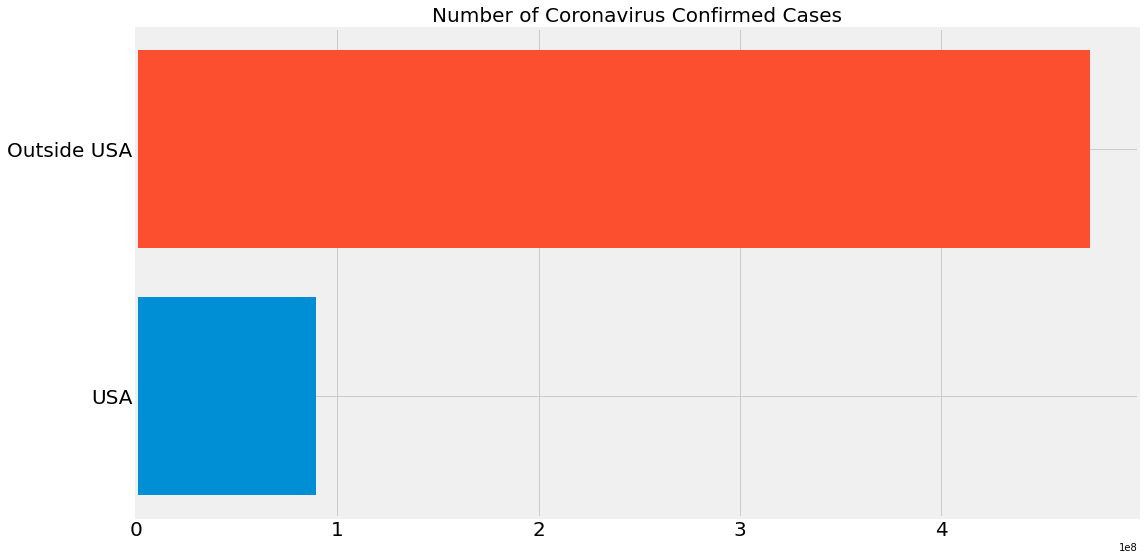

In [30]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [31]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 473968566 cases:
USA: 89712243 cases
Total: 563680809 cases


In [32]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [33]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

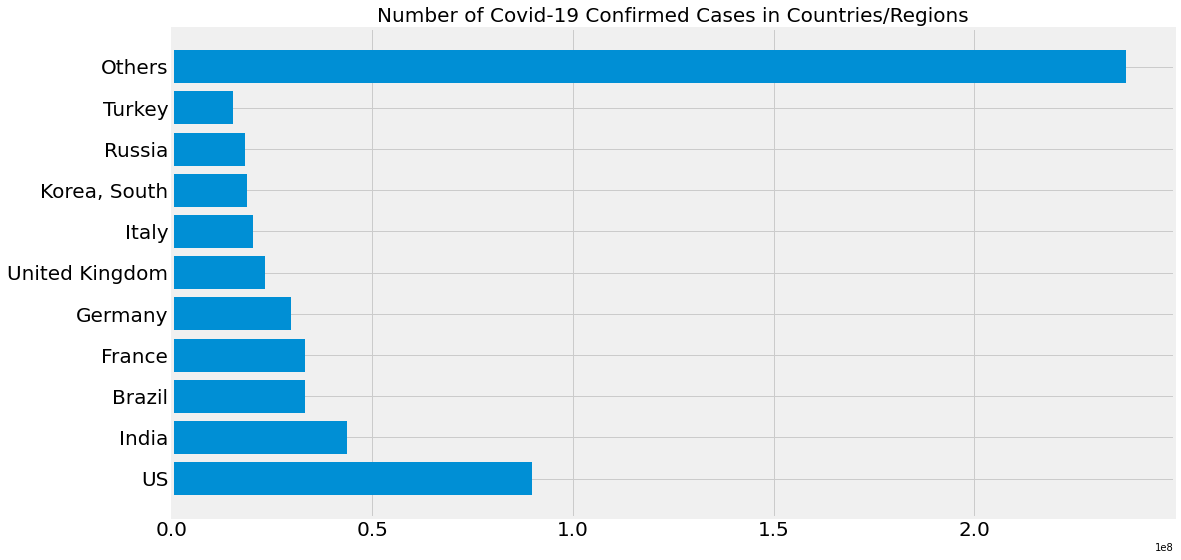

In [34]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [35]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

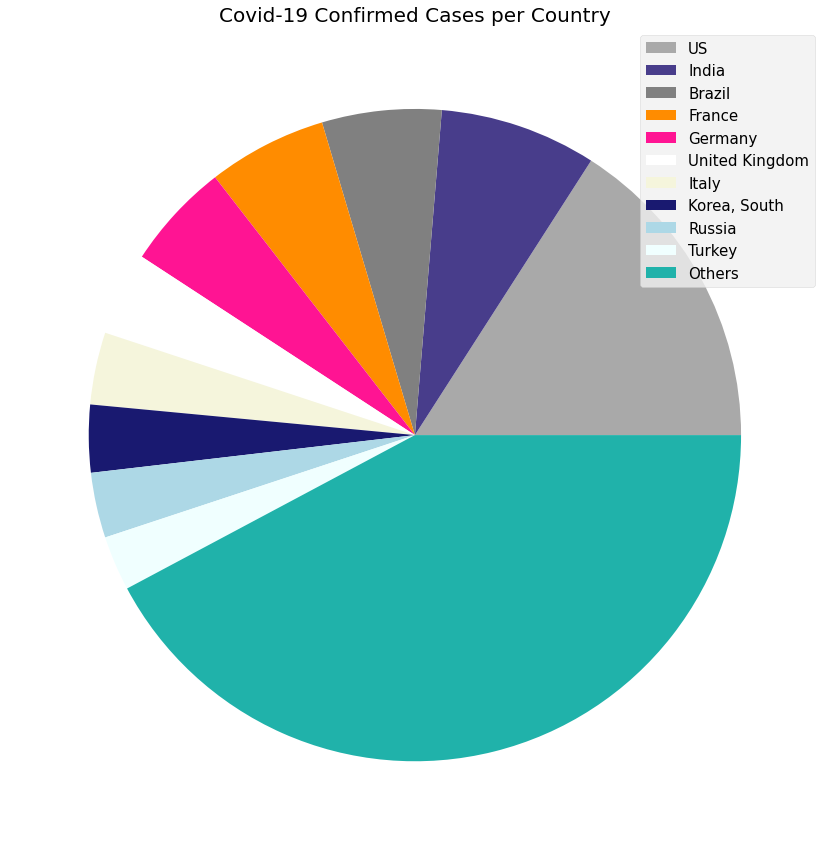

In [36]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [37]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

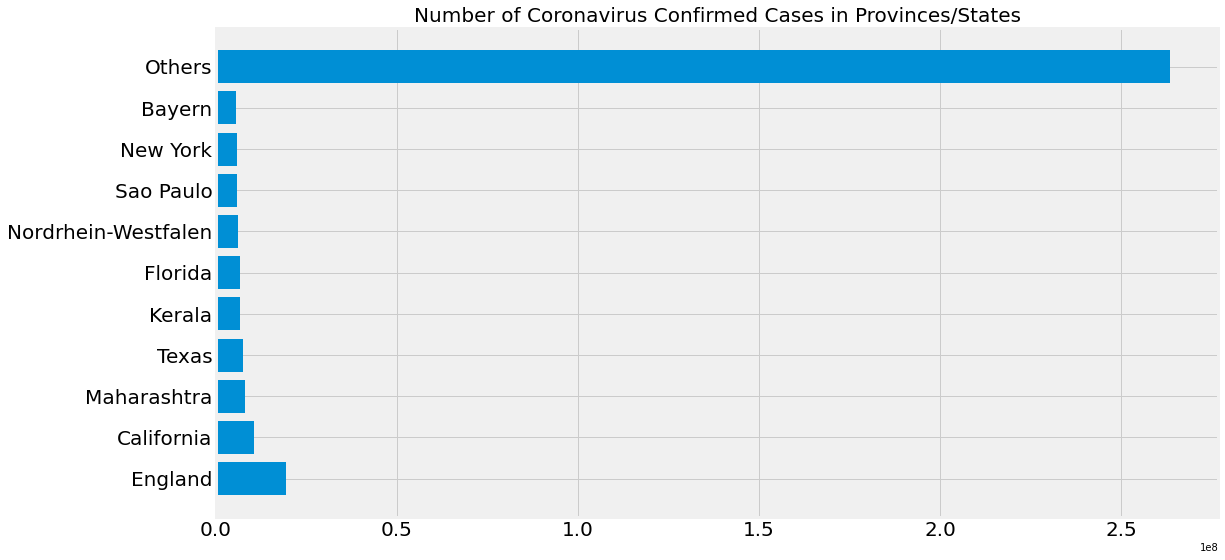

In [38]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [39]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

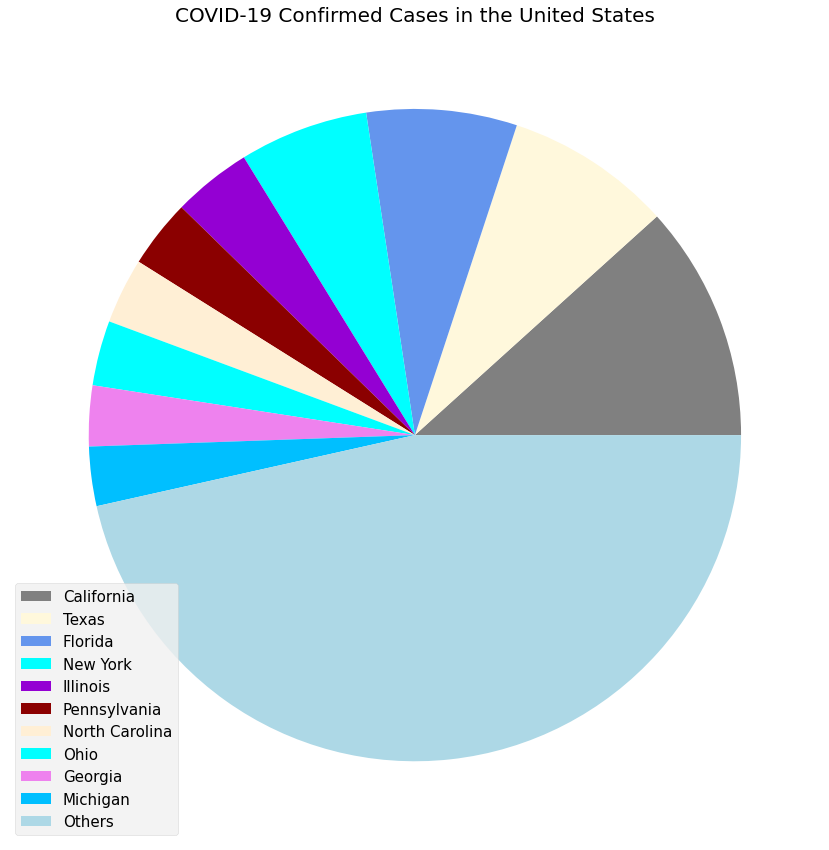

In [40]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

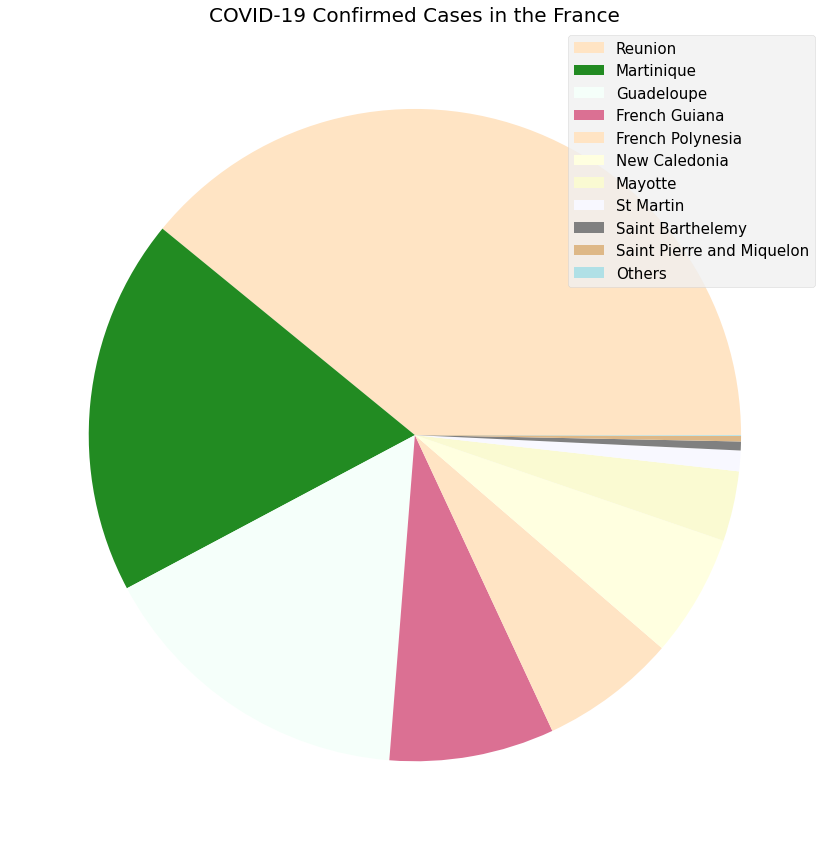

In [41]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in the France')

In [42]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [43]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [44]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [61]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [46]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [47]:
#transforming data for lstm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
lstm_X_train_confirmed = scaler.fit_transform(X_train_confirmed)
lstm_X_test_confirmed = scaler.fit_transform(X_test_confirmed)
lstm_future_forecast = scaler.fit_transform(future_forecast)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
svr_X_train_confirmed = sc.fit_transform(X_train_confirmed)
svr_X_test_confirmed = sc.fit_transform(X_test_confirmed)
svr_future_forecast = sc.fit_transform(future_forecast)

In [49]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 158775181.6946473
MSE: 3.1898408052411596e+16


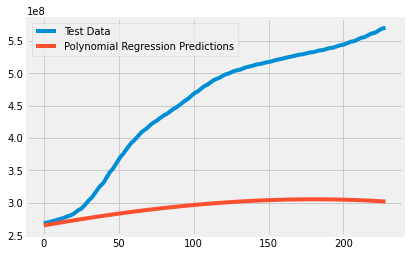

In [50]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [51]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional
#from tensorflow.keras.layers import Dense

In [52]:
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the LsTM
model = Sequential()
model.add(LSTM(100,return_sequences=True, kernel_initializer='uniform', activation= 'relu',  input_shape=(poly_X_train_confirmed.shape[1],X_test_confirmed.shape[-1])))
model.add(Dropout(0.6))
model.add(LSTM(20,return_sequences=False, kernel_initializer='uniform', activation= 'relu',))
model.add(Dropout(0.6))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')


history = model.fit(poly_X_train_confirmed, y_train_confirmed, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 3s 31ms/step - loss: 8132029338091520.0000 - val_loss: 48344259257958400.0000
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 6689728854228992.0000 - val_loss: 21506900558348288.0000
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 2994518576070656.0000 - val_loss: 563936856375296.0000
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 1874043078705152.0000 - val_loss: 3225943762010112.0000
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 1553040578445312.0000 - val_loss: 4863787932844032.0000
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 1674280391671808.0000 - val_loss: 4319779053633536.0000
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 1540837502615552.0000 - val_loss: 3893196459343872.0000
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 1797412943298560.

In [53]:
lstm_pred = model.predict(poly_X_test_confirmed)
lstm1_pred = model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(lstm_pred, y_test_confirmed))
print('MSE:',mean_squared_error(lstm_pred, y_test_confirmed))

MAE: 50230576.80349345
MSE: 4845570817742405.0


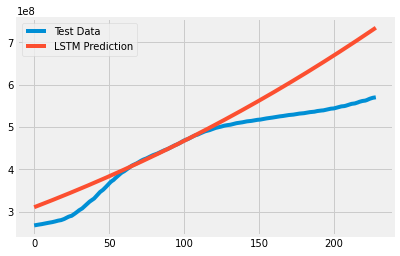

In [54]:
plt.plot(y_test_confirmed)
plt.plot(lstm_pred)
plt.legend(['Test Data', 'LSTM Prediction'])

In [55]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
tree = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
tree.fit(svr_X_train_confirmed, y_train_confirmed)

DecisionTreeRegressor(random_state=0)

In [56]:
dec_pred1 = tree.predict(svr_X_test_confirmed)
dec_pred2 = tree.predict(svr_future_forecast)
print('MAE:', mean_absolute_error(dec_pred1, y_test_confirmed))
print('MSE:',mean_squared_error(dec_pred1, y_test_confirmed))

MAE: 353610574.78165936
MSE: 1.2703158955820435e+17


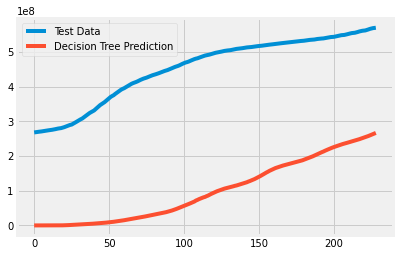

In [57]:
plt.plot(y_test_confirmed)
plt.plot(dec_pred1)
plt.legend(['Test Data', 'Decision Tree Prediction'])

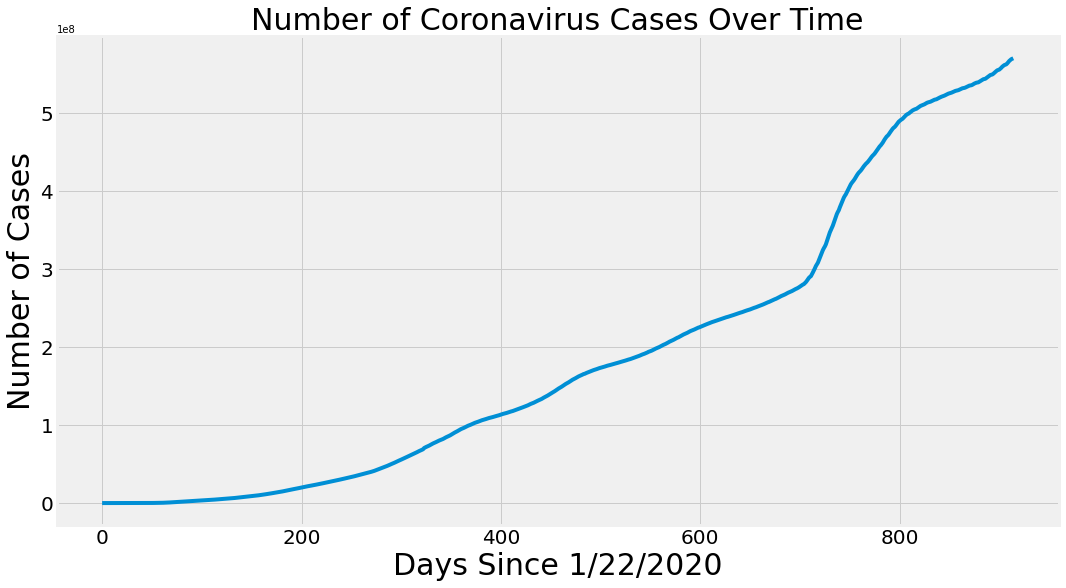

In [58]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

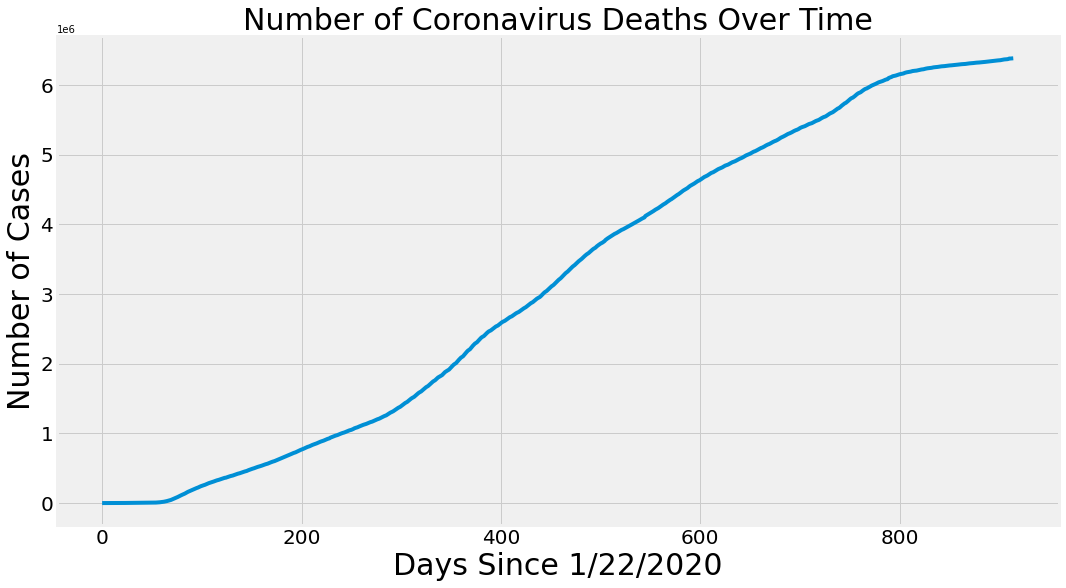

In [59]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

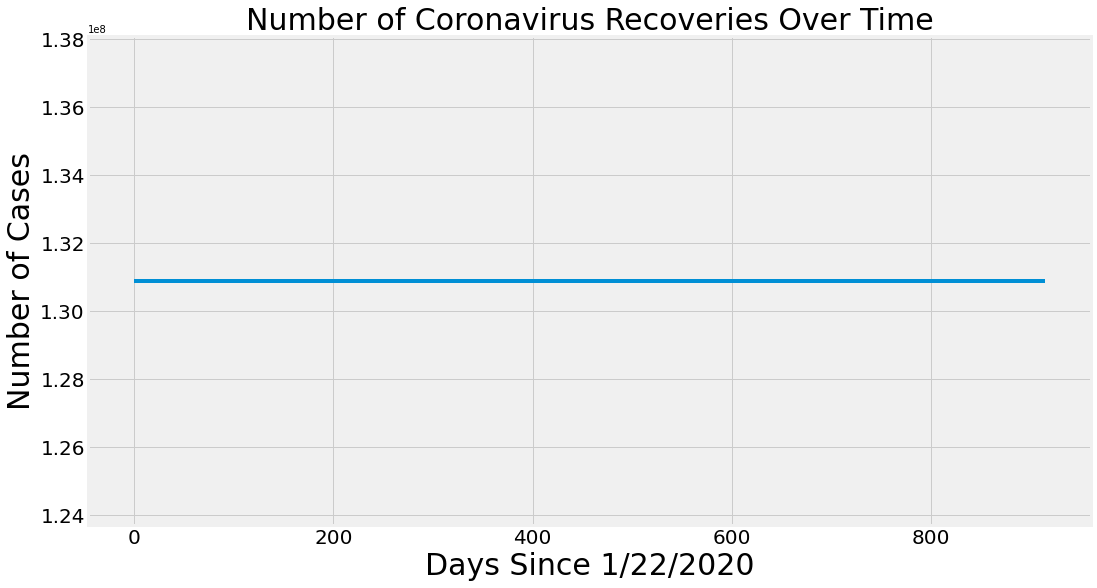

In [60]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

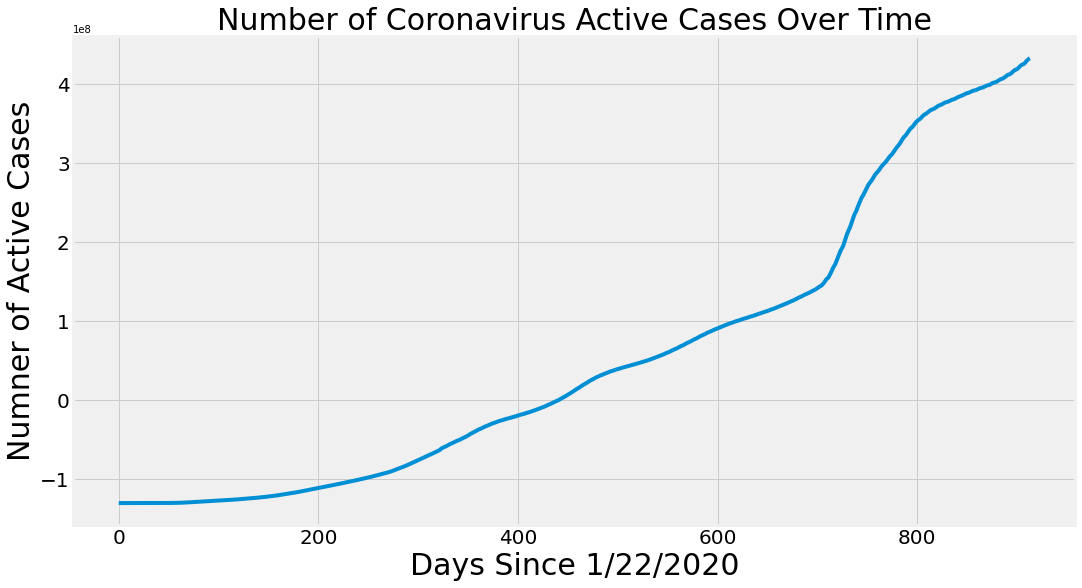

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

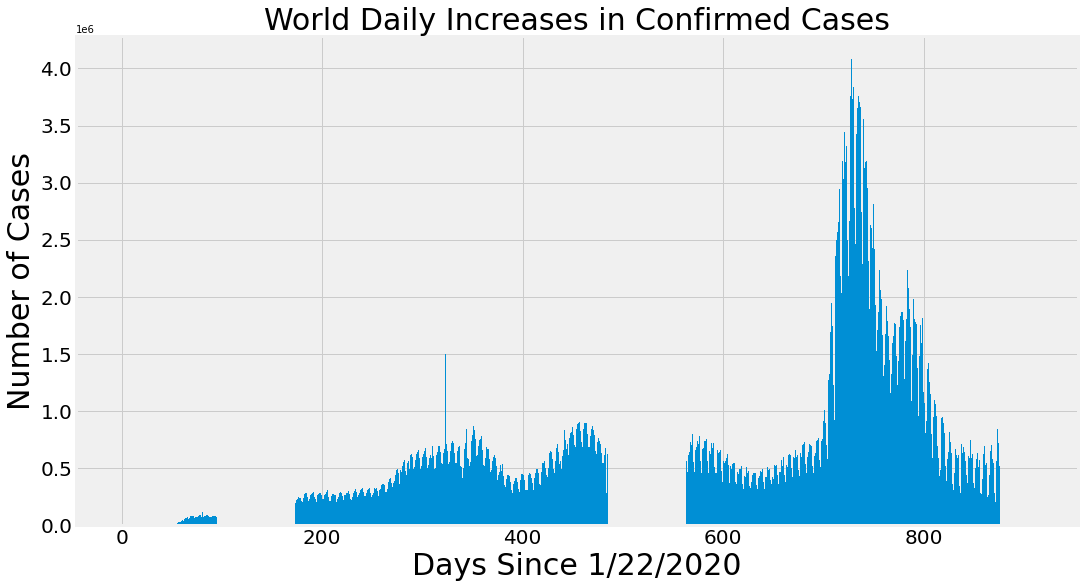

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

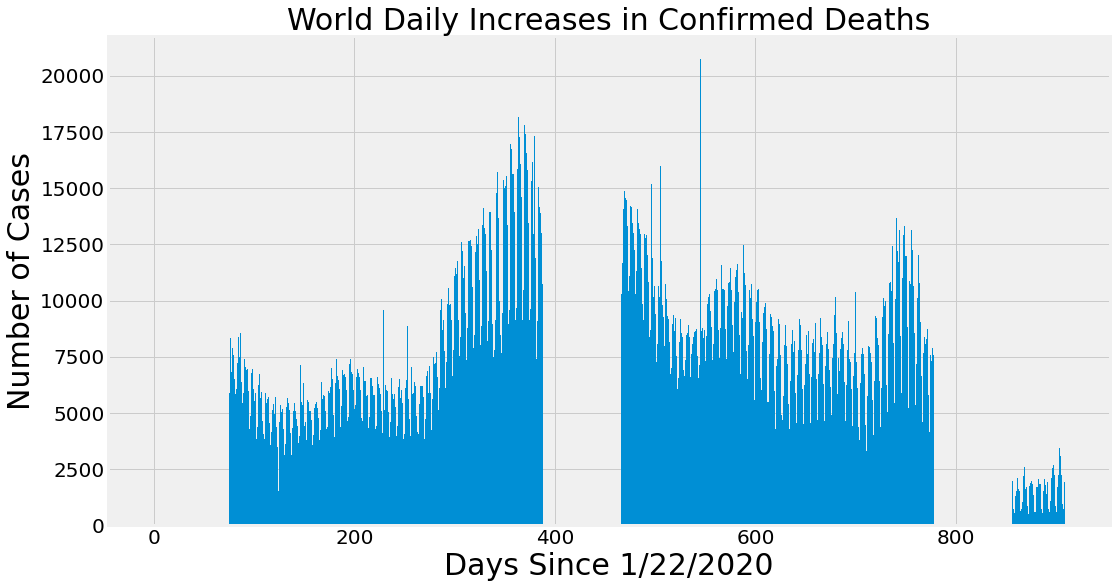

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

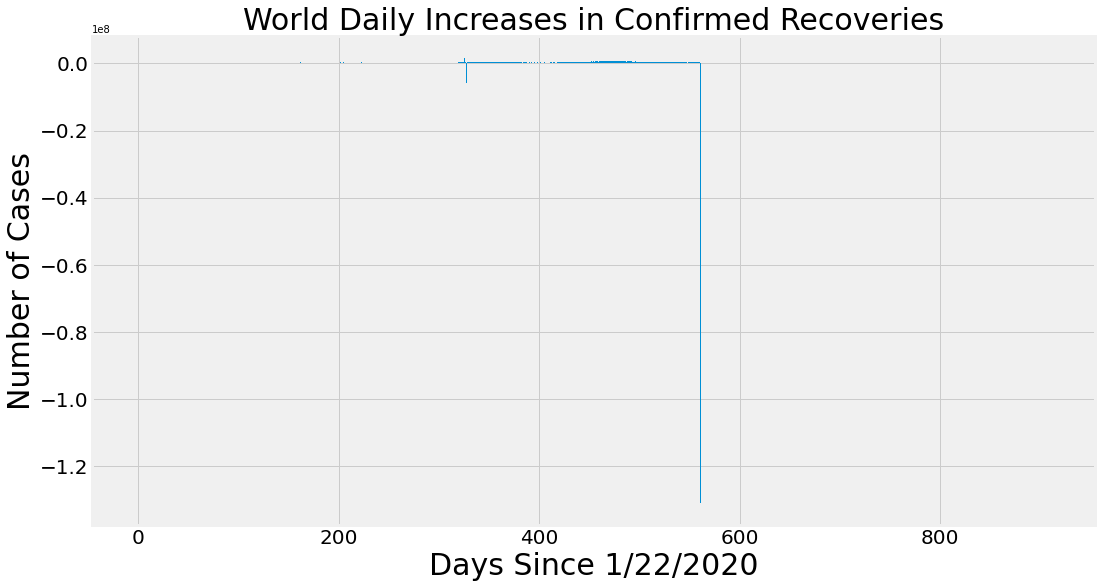

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

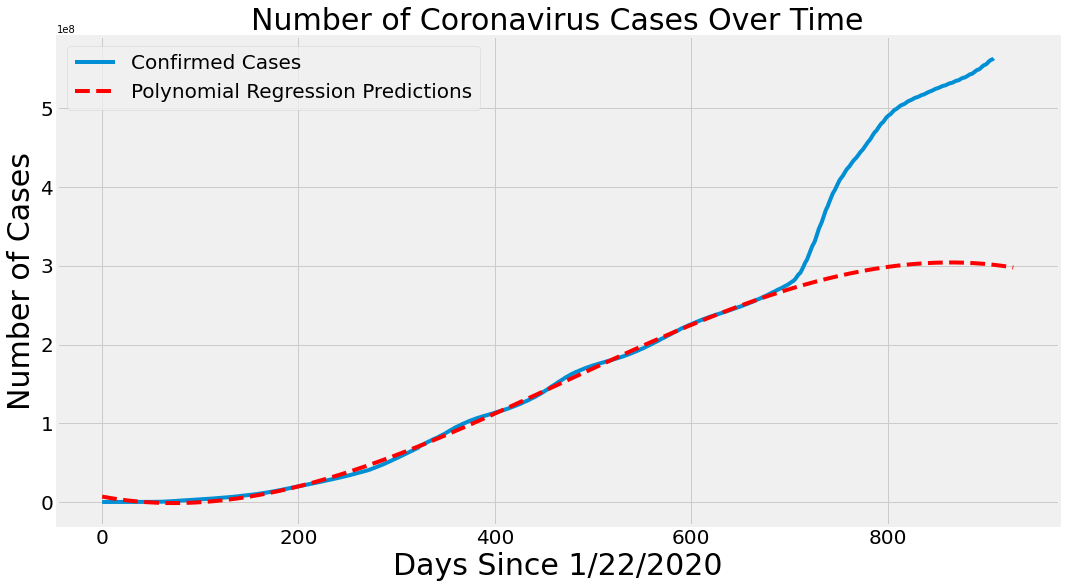

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

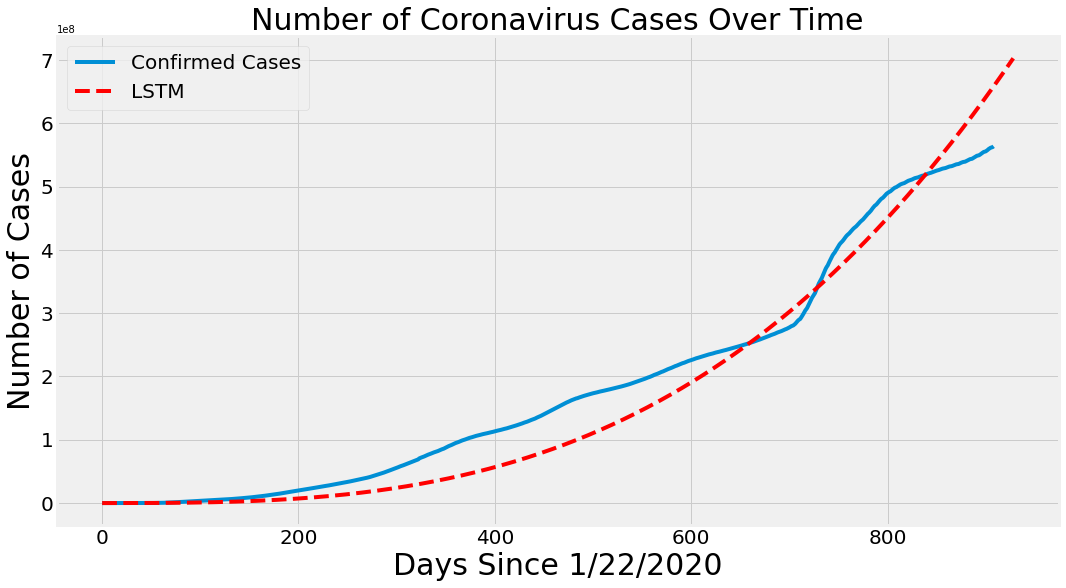

In [ ]:
plot_predictions(adjusted_dates, world_cases,lstm1_pred, 'LSTM', 'red')

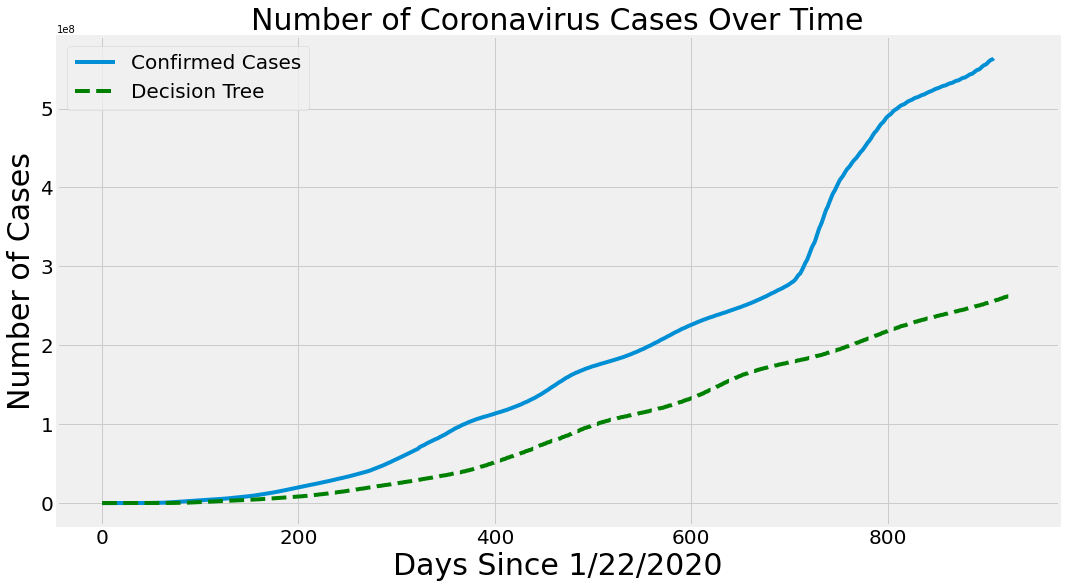

In [ ]:
plot_predictions(adjusted_dates, world_cases, dec_pred2, 'Decision Tree', 'green')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

Date  Predicted number of Confirmed Cases Worldwide
0   07/19/2022                                    301188735.0
1   07/20/2022                                    301047295.0
2   07/21/2022                                    300902583.0
3   07/22/2022                                    300754592.0
4   07/23/2022                                    300603314.0
5   07/24/2022                                    300448743.0
6   07/25/2022                                    300290870.0
7   07/26/2022                                    300129689.0
8   07/27/2022                                    299965192.0
9   07/28/2022                                    299797371.0
10  07/29/2022                                    299626219.0
11  07/30/2022                                    299451729.0
12  07/31/2022                                    299273893.0
13  08/01/2022                                    299092704.0
14  08/02/2022                                    298908155.0
15  08/03/2022                                    298720238.0
16  08/04/2022                                    298528945.0
17  08/05/2022                                    298334270.0
18  08/06/2022                                    298136204.0
19  08/07/2022                                    297934741.0

In [ ]:
y_pred5 = lstm_pred.reshape(1,-1)[0]
lstm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(y_pred5[-20:])})
lstm_df

Date  Predicted number of Confirmed Cases Worldwide
0   07/19/2022                                    617971200.0
1   07/20/2022                                    620054272.0
2   07/21/2022                                    622141952.0
3   07/22/2022                                    624234368.0
4   07/23/2022                                    626331392.0
5   07/24/2022                                    628433152.0
6   07/25/2022                                    630539712.0
7   07/26/2022                                    632650752.0
8   07/27/2022                                    634766592.0
9   07/28/2022                                    636887232.0
10  07/29/2022                                    639012480.0
11  07/30/2022                                    641142528.0
12  07/31/2022                                    643277248.0
13  08/01/2022                                    645416768.0
14  08/02/2022                                    647561024.0
15  08/03/2022                                    649709952.0
16  08/04/2022                                    651863552.0
17  08/05/2022                                    654022208.0
18  08/06/2022                                    656185408.0
19  08/07/2022                                    658353344.0

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'DT Predicted # of Confirmed Cases Worldwide': np.round(dec_pred2[-20:])})
svm_df

Date  DT Predicted # of Confirmed Cases Worldwide
0   07/19/2022                                  256342758.0
1   07/20/2022                                  256958034.0
2   07/21/2022                                  257458078.0
3   07/22/2022                                  257458078.0
4   07/23/2022                                  257878836.0
5   07/24/2022                                  258480726.0
6   07/25/2022                                  259072925.0
7   07/26/2022                                  259072925.0
8   07/27/2022                                  259730834.0
9   07/28/2022                                  260330225.0
10  07/29/2022                                  260942660.0
11  07/30/2022                                  260942660.0
12  07/31/2022                                  261426630.0
13  08/01/2022                                  261858772.0
14  08/02/2022                                  261858772.0
15  08/03/2022                                  262490840.0
16  08/04/2022                                  263090746.0
17  08/05/2022                                  263793386.0
18  08/06/2022                                  263793386.0
19  08/07/2022                                  264501558.0

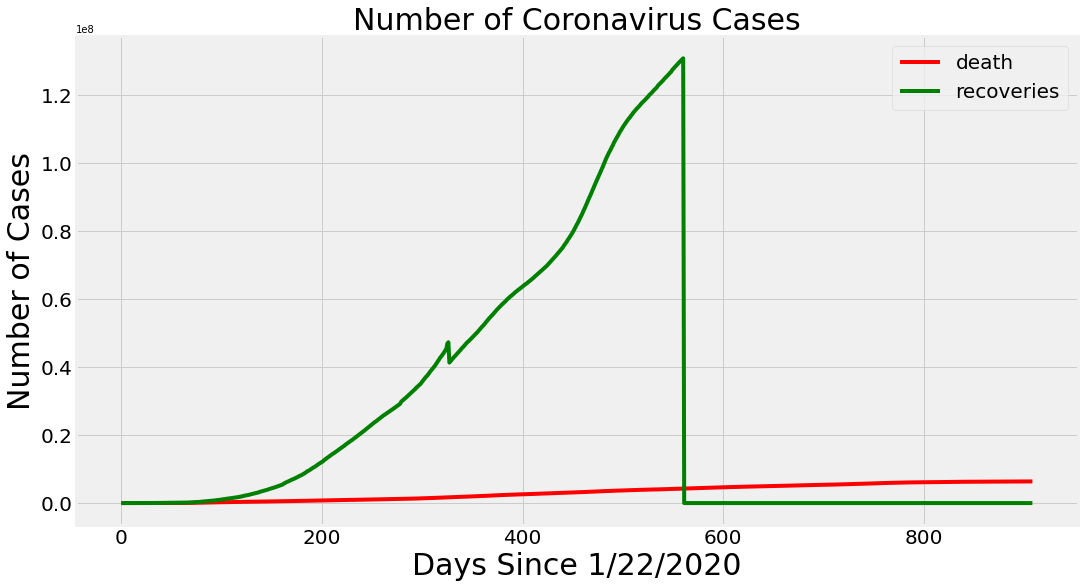

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

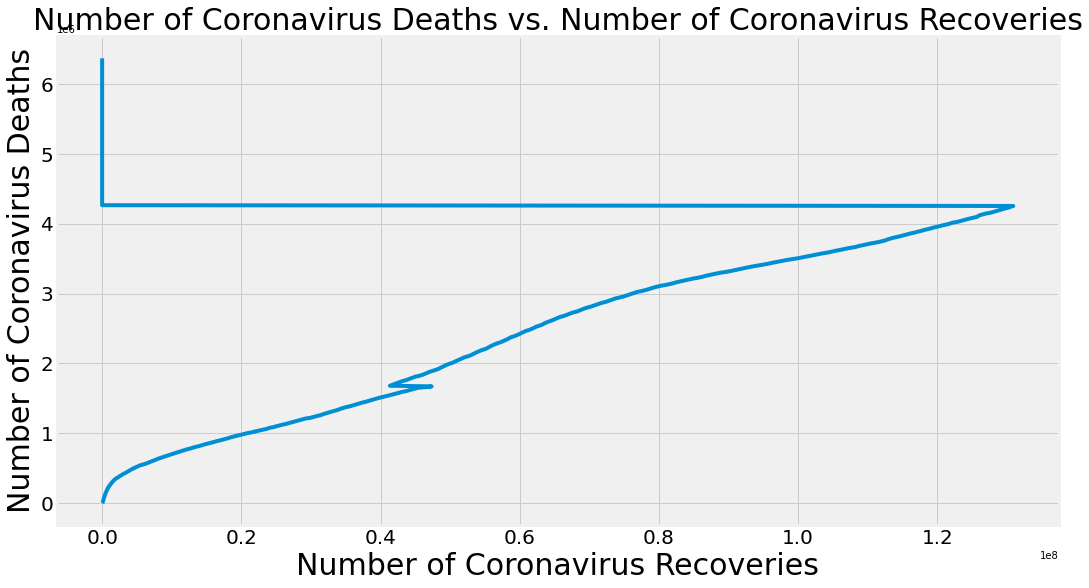

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

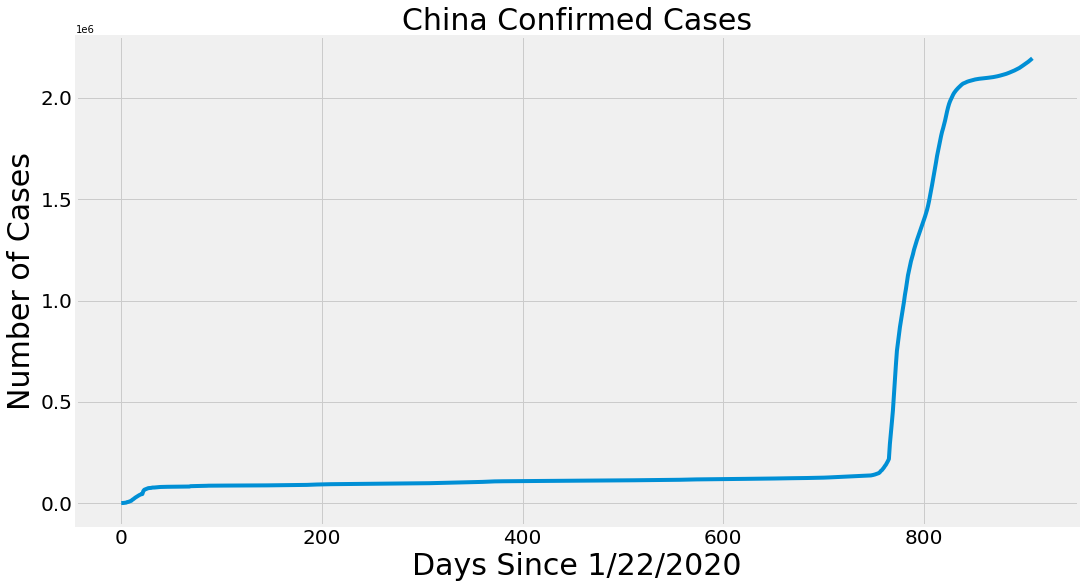

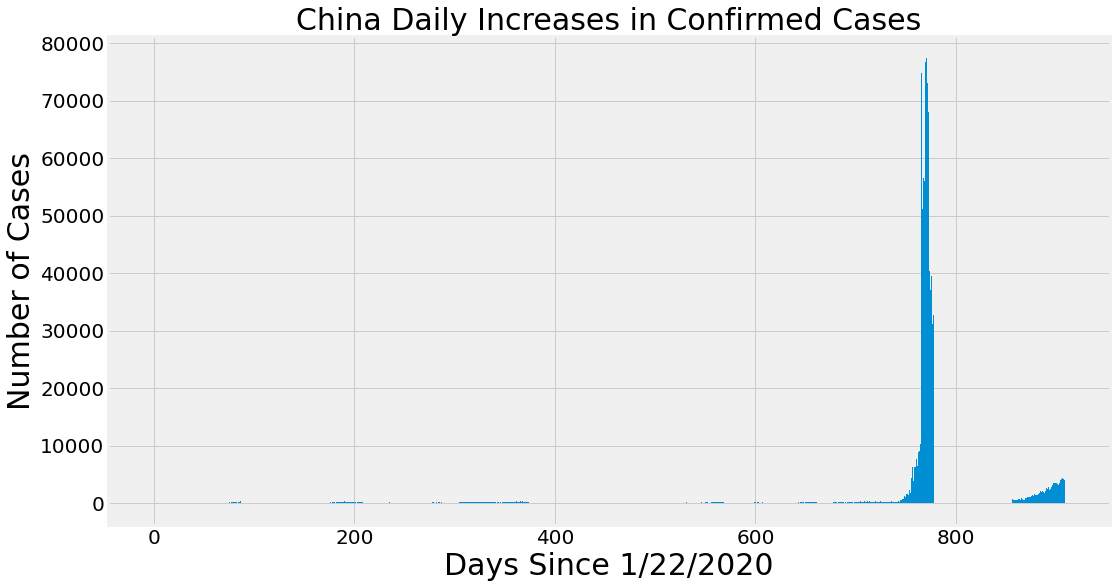

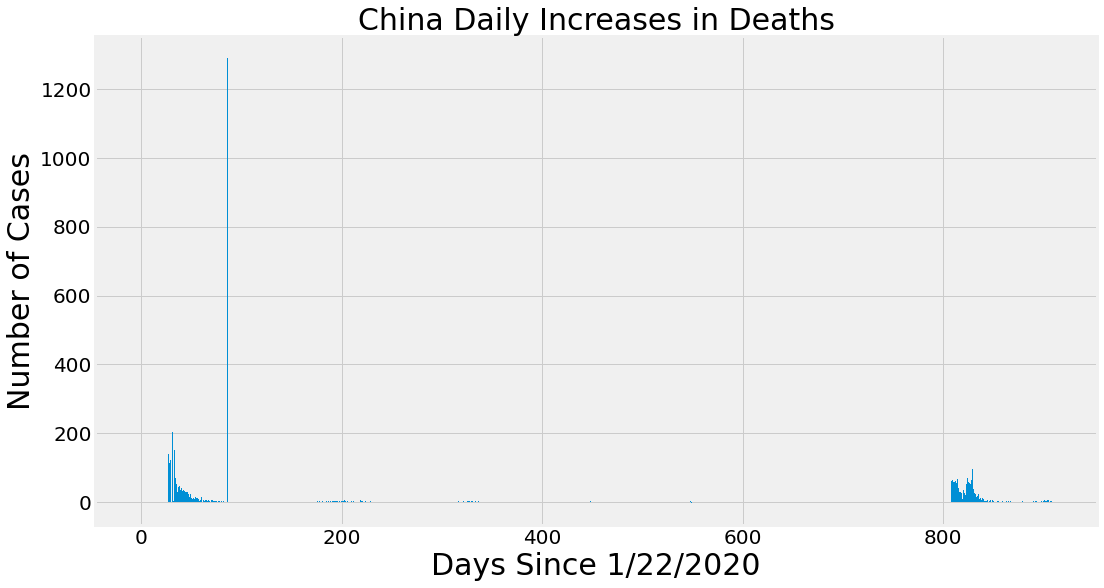

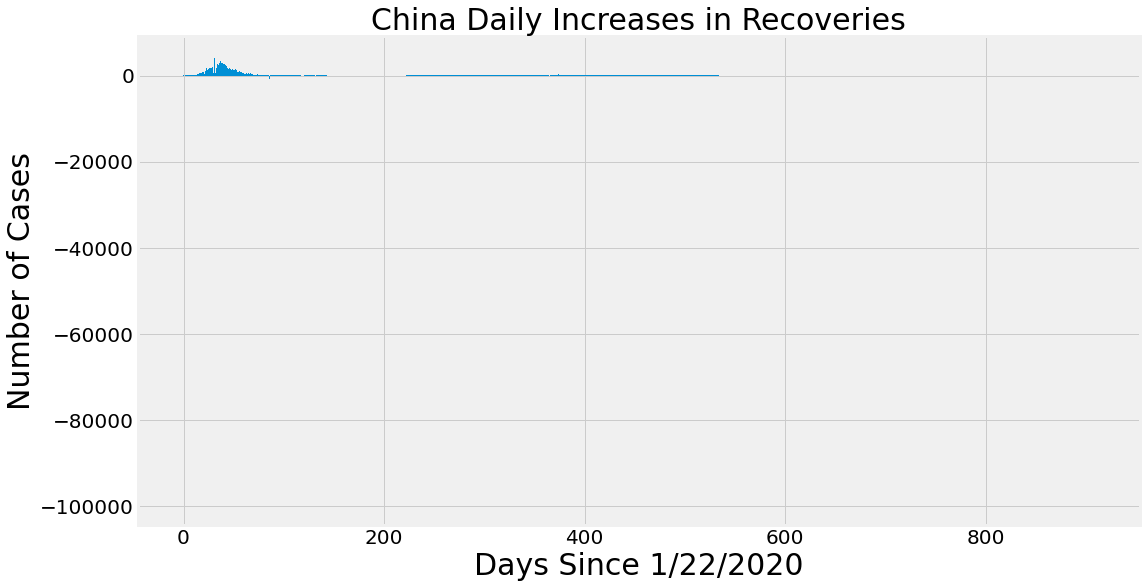

In [ ]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

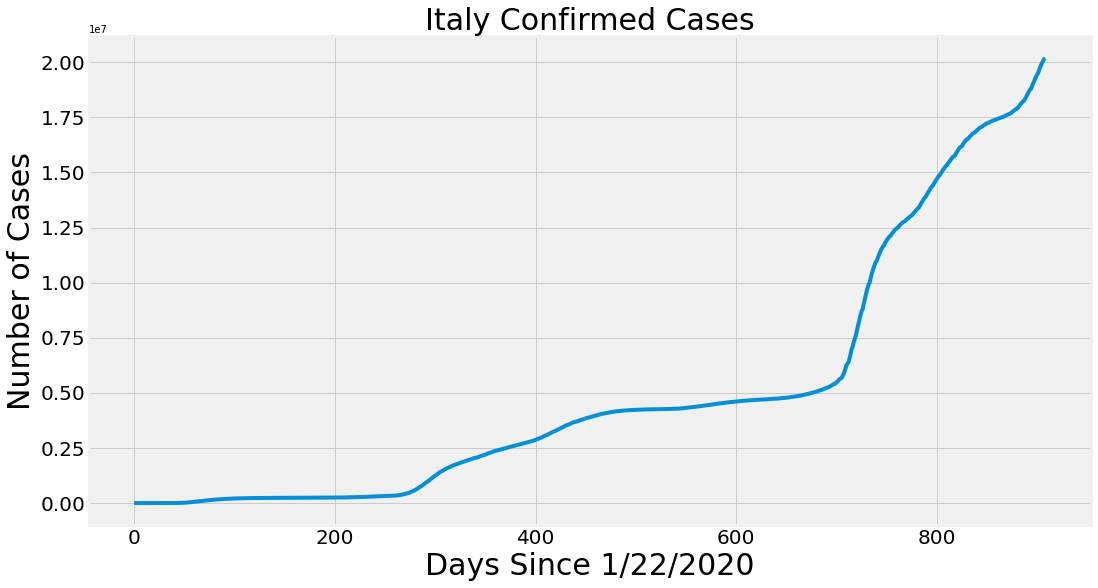

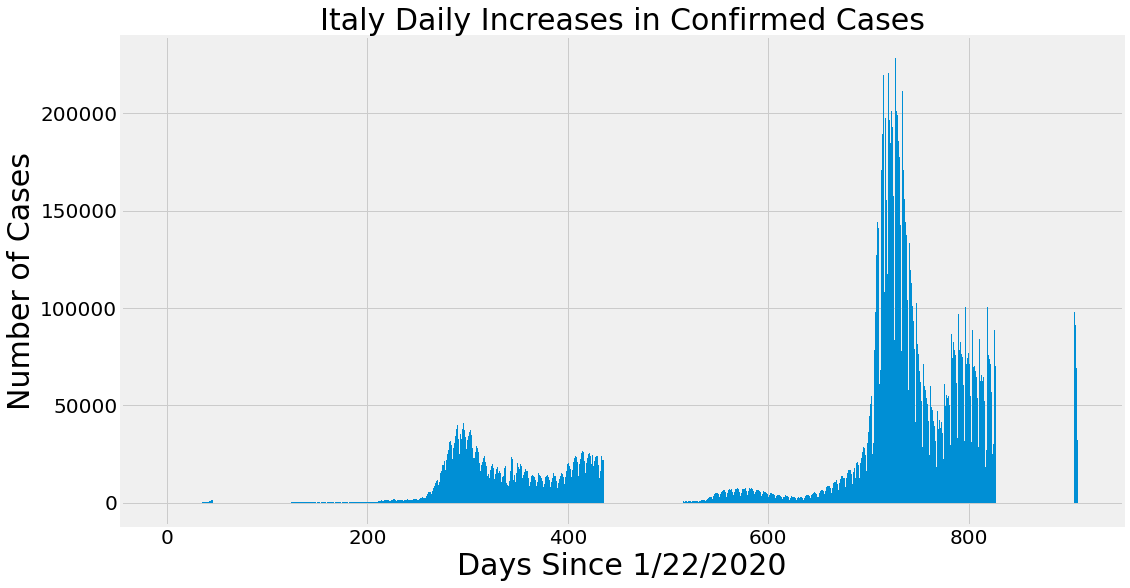

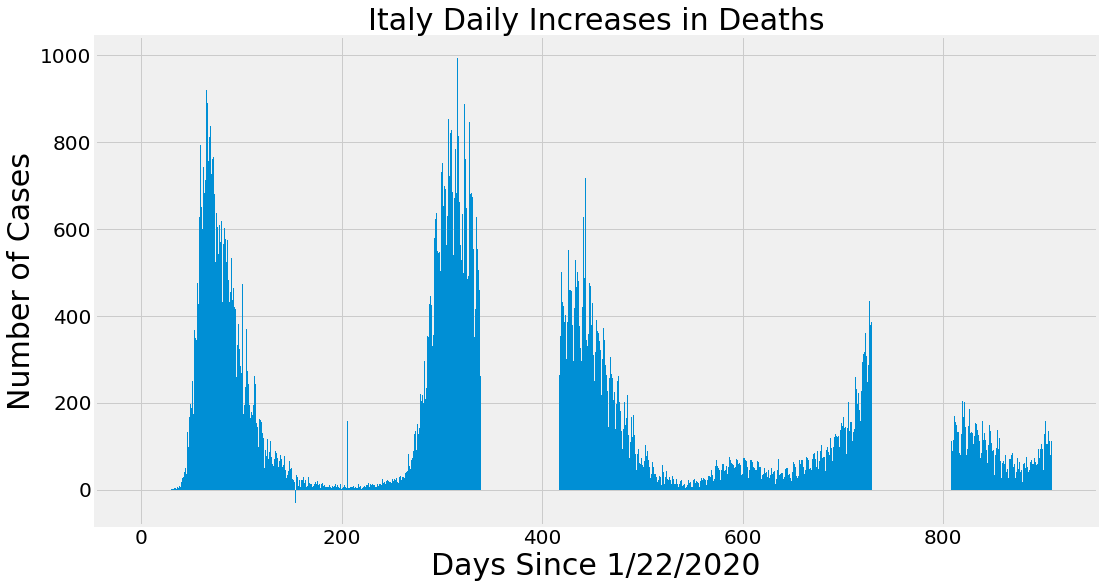

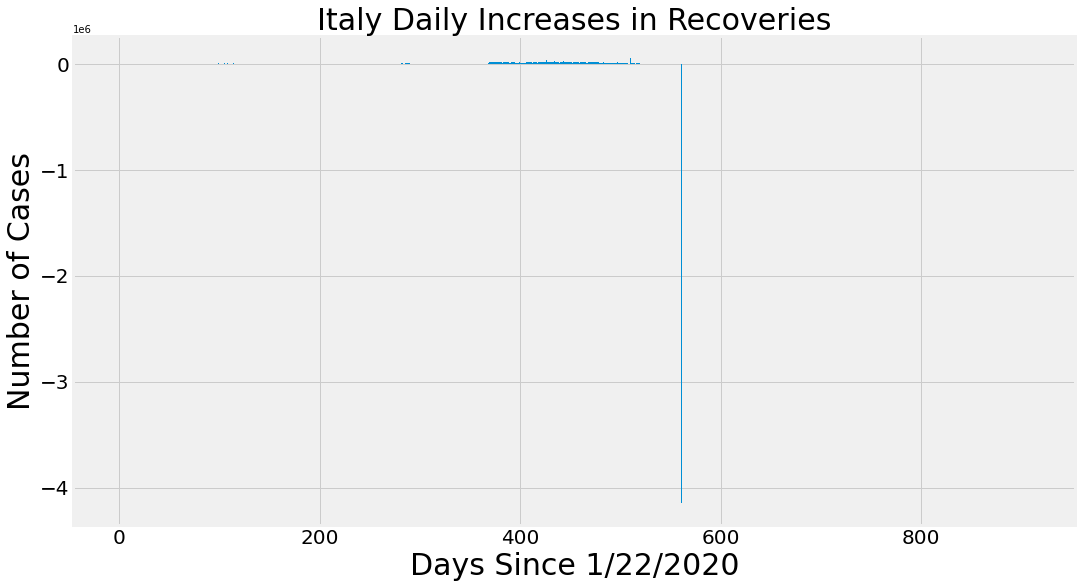

In [ ]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

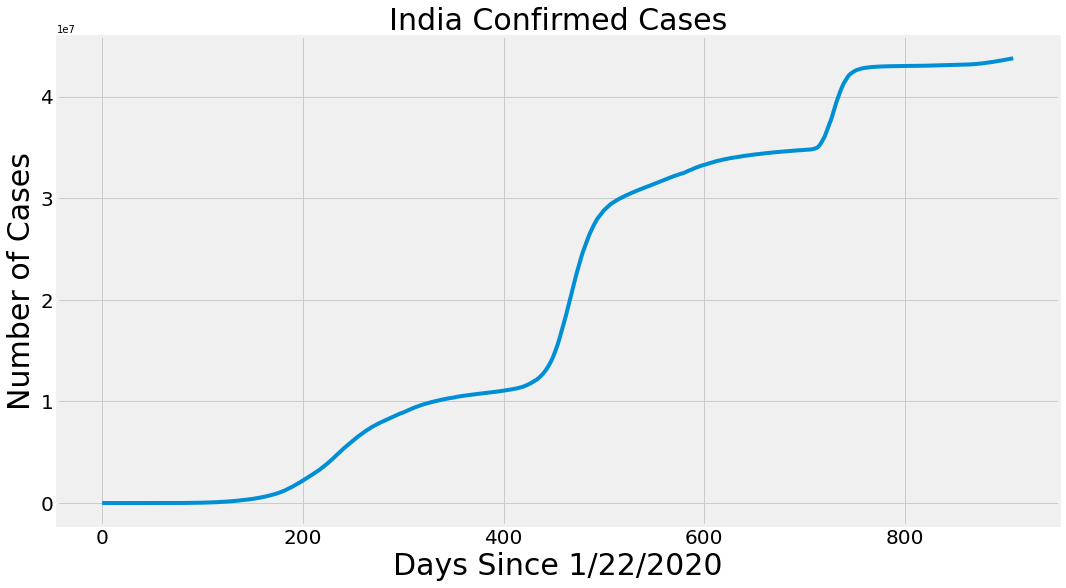

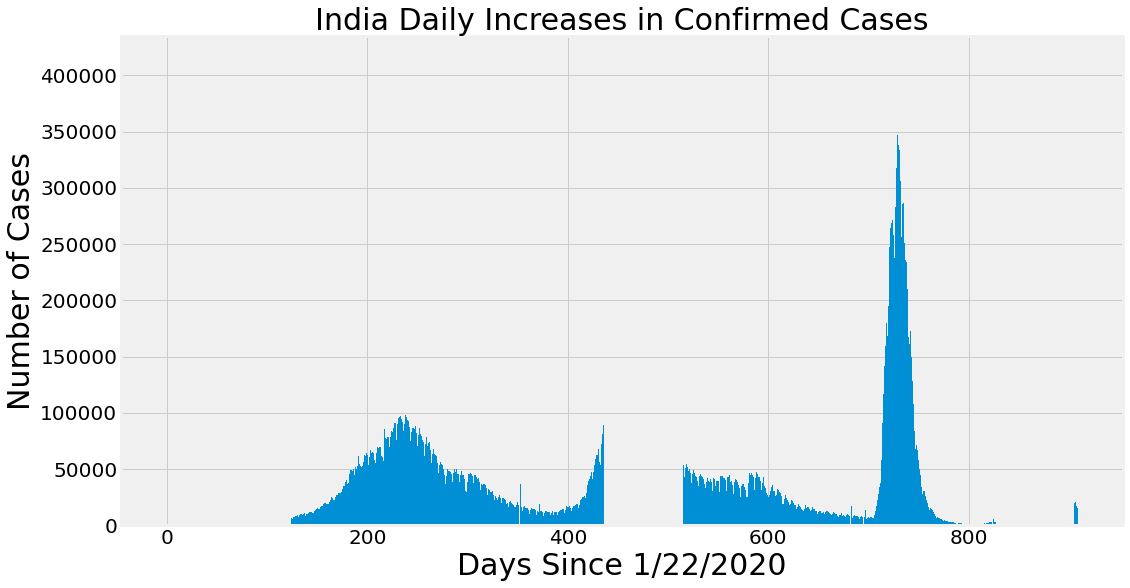

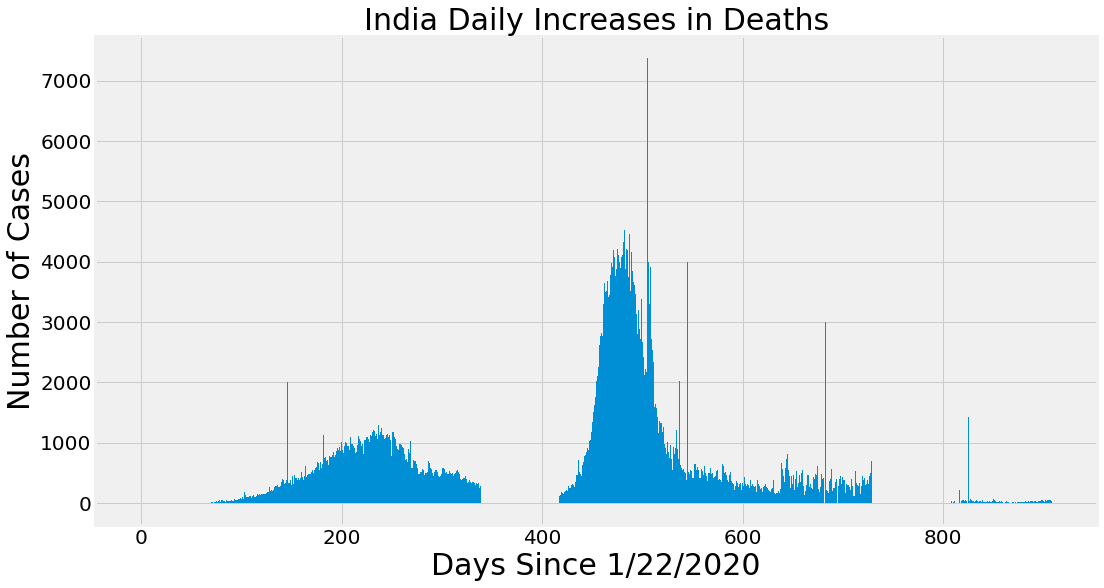

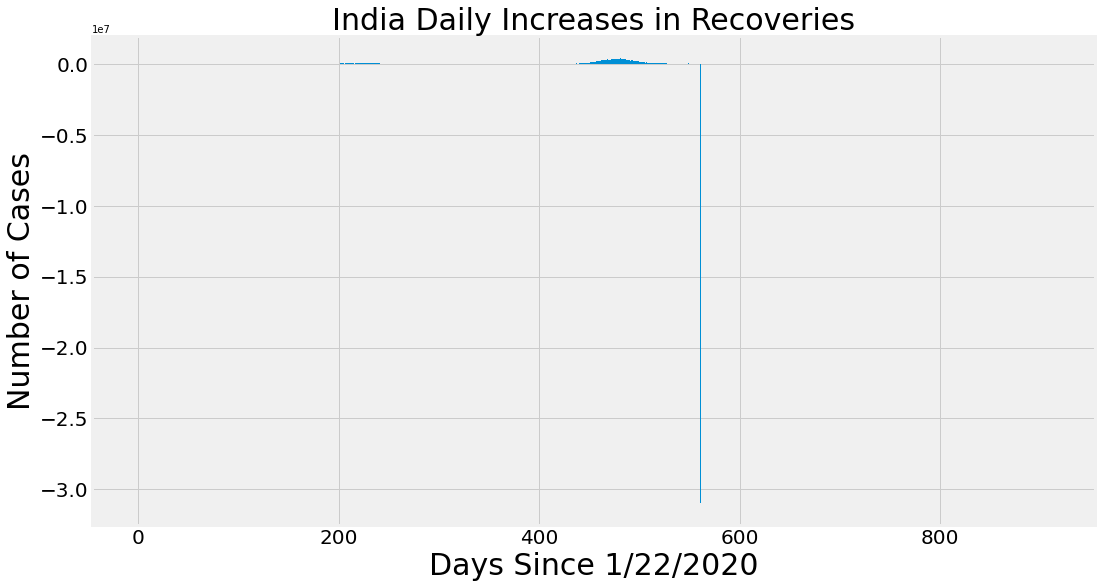

In [ ]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

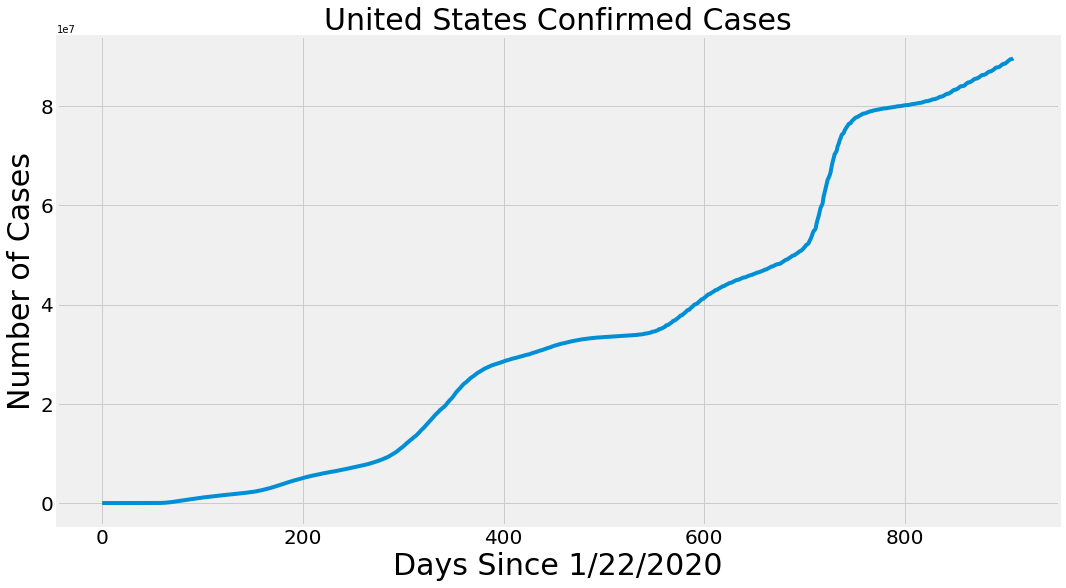

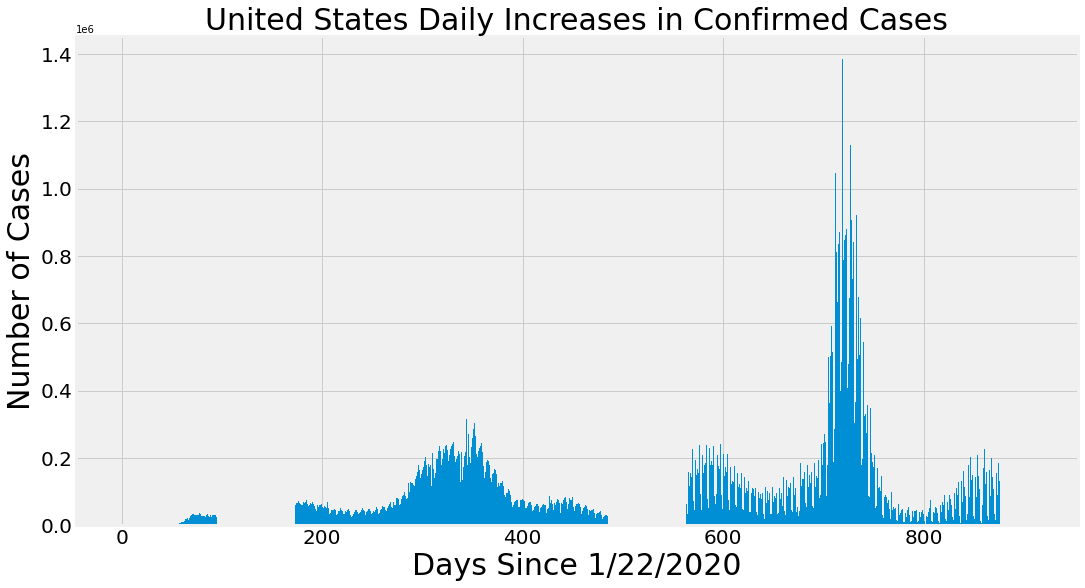

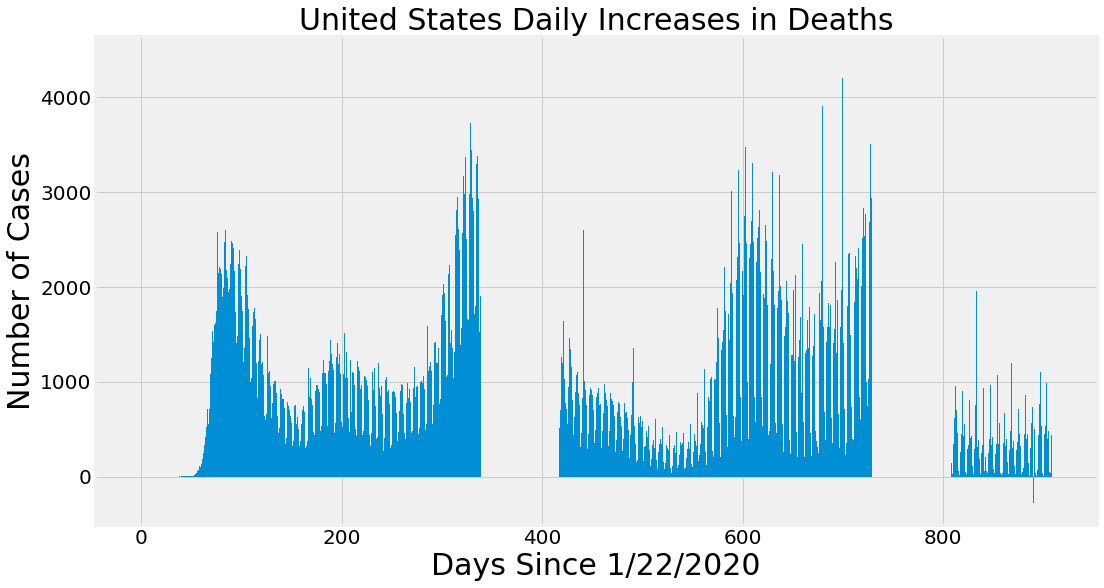

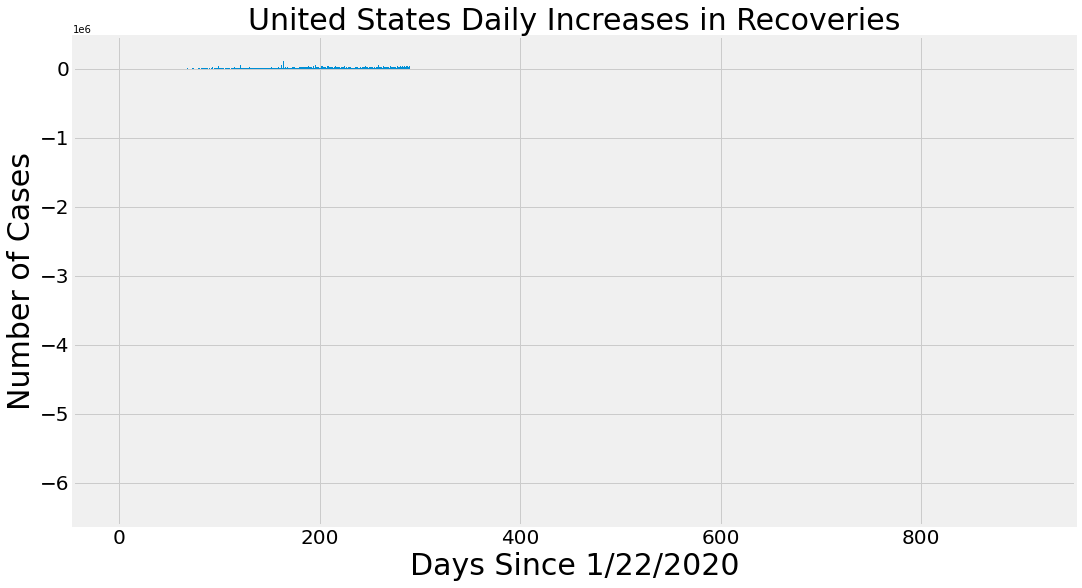

In [ ]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

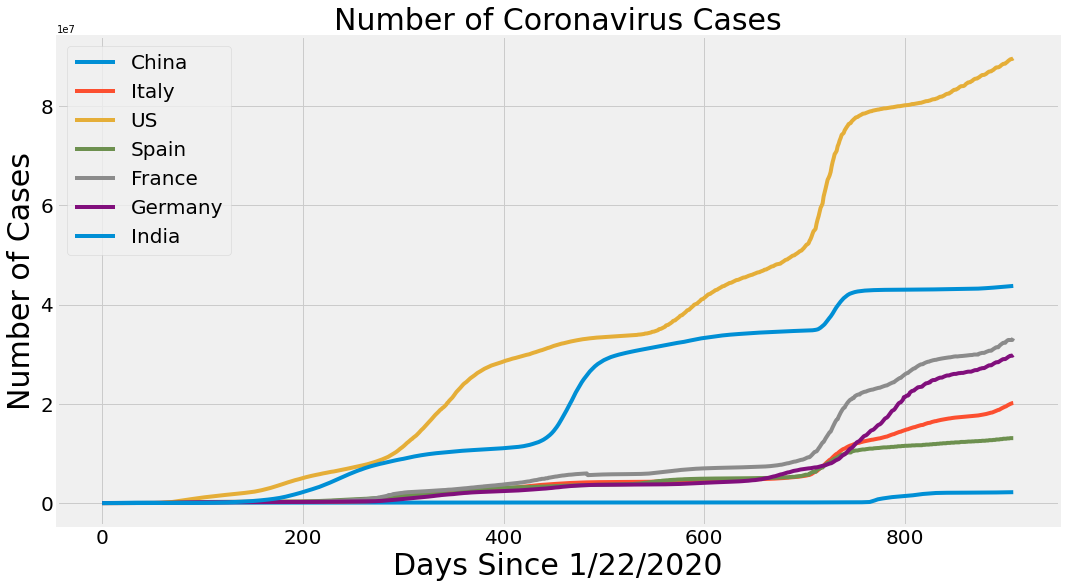

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

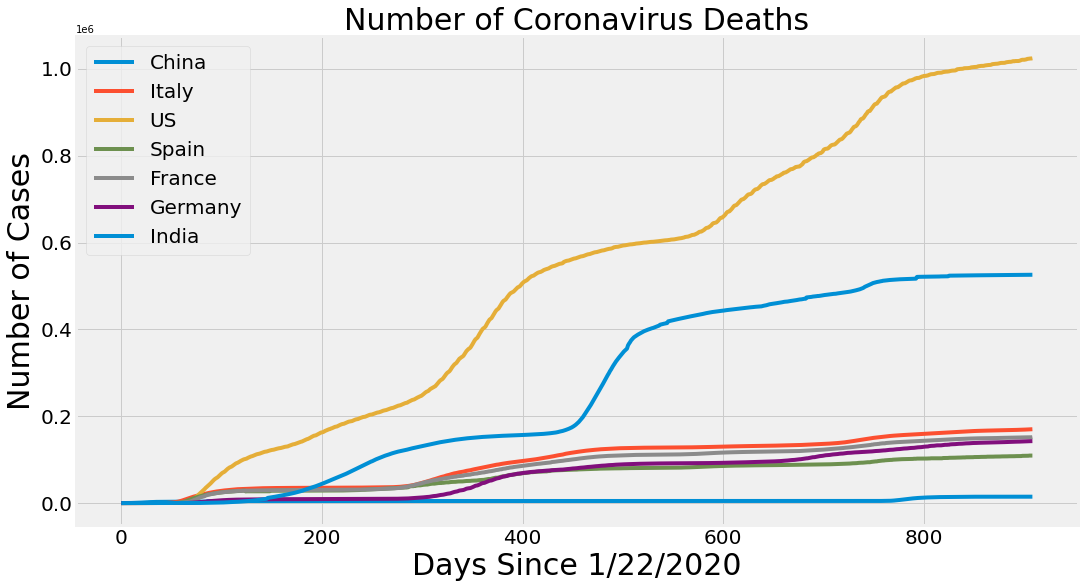

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

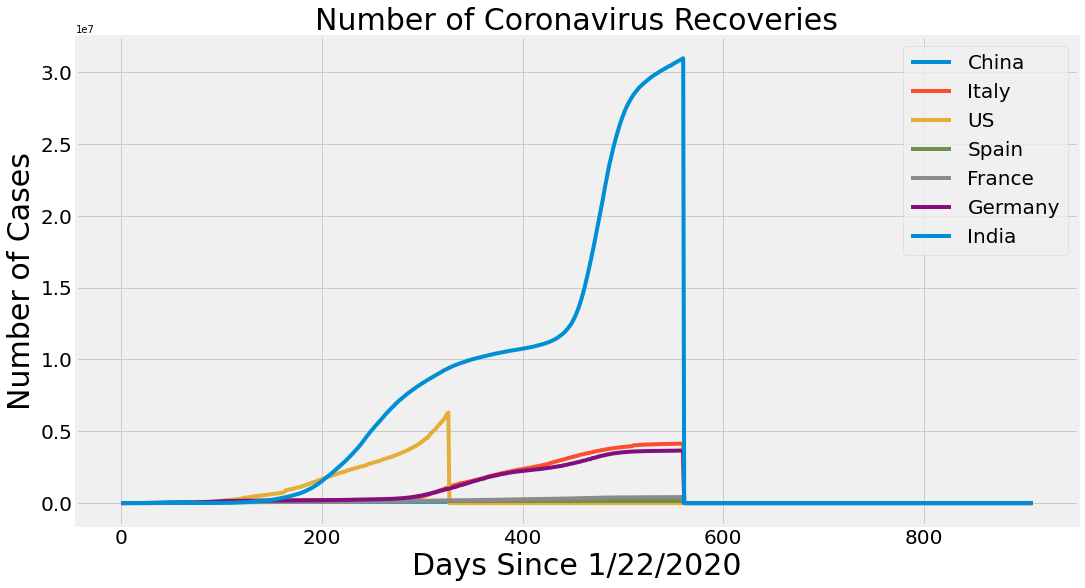

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()